In [1]:
# data wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

We import the data frame obtained in preprocessing.

In [2]:
df= pd.read_csv("data/price-units-data.csv")

### Linear regression with all products

In [3]:
from sklearn.model_selection import train_test_split

X = df['price'].to_numpy()
y = df['units'].to_numpy()

In [4]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.3, random_state=42)

In [5]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

LinearRegression()

In [6]:
test_predictions = model_all.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [8]:
MAE, MSE, RMSE

(226.2424296993316, 80000.65912270626, 282.8438776475571)

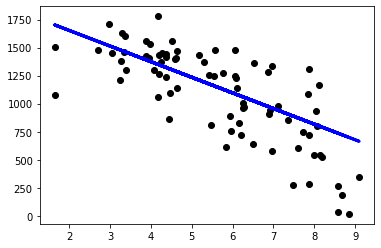

In [9]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, test_predictions, color="blue", linewidth=3)

In [10]:
print(model_all.coef_)

[-139.40120623]


In [11]:
#Check other statistics using statsmodels
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     254.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.55e-40
Time:                        12:59:02   Log-Likelihood:                -1838.2
No. Observations:                 260   AIC:                             3680.
Df Residuals:                     258   BIC:                             3687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1973.1963     52.940     37.272      0.0

## Multilinear regression

Let's make a copy of the data frame and map out the packsize and volume to categorical data to used them as attributes in the multilinear regression.

In [12]:
data_mapped = df.copy()
data_mapped["packsize"] = data_mapped["packsize"].map({1:"1",6:"6"})
data_mapped["volume_per_joghurt_g"] = data_mapped["volume_per_joghurt_g"].map({150:"small",500:"medium", 1000: "large"})

In [13]:
data_mapped.head()

,date,product_id,price,units,brand,flavour,volume_per_joghurt_g,packsize
0,2020-01-01,0,4.65,1126.0,Mueller,blueberry,small,6
1,2020-01-02,0,4.76,1205.0,Mueller,blueberry,small,6
2,2020-01-03,0,5.22,1007.0,Mueller,blueberry,small,6
3,2020-01-04,0,5.45,1282.0,Mueller,blueberry,small,6
4,2020-01-05,0,3.33,1037.0,Mueller,blueberry,small,6


In [14]:
# X are all the attributes to which we want to fit the "units" 
X = data_mapped[['price', 'brand', 'flavour', 'packsize', 'volume_per_joghurt_g', 'product_id']]
y = data_mapped['units']

In [15]:
# Turn categorical attributes to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X

,price,product_id,brand_Activia,brand_Alnatura,brand_Danone,brand_Ecke-Mit-Was-Drin,brand_Ja!,brand_Mueller,brand_Oikos,brand_Rewe,flavour_chocolate,flavour_raspberry,flavour_straciatella,flavour_strawberry,packsize_6,volume_per_joghurt_g_medium,volume_per_joghurt_g_small
0,4.65,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,4.76,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,5.22,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,5.45,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,3.33,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,3.18,26,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
256,2.81,26,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
257,5.00,26,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
258,3.38,26,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [16]:
#Create the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# create a linear regression object
multi_model = LinearRegression()

In [18]:
multi_model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = multi_model.predict(X_test)
test_predictions

array([1667.46023182, 1232.70405078, 1302.44004644,  543.5702811 ,
        898.00771822, 1339.43804191, 1280.05120805,  558.27982557,
       1063.62781363, 1191.39567551, 1249.73706935,  620.20889454,
       1732.49059834,  662.58086403,  670.59353505,  650.18835145,
       1202.3885585 , 1263.97343369,  887.68062441, 1145.05992634,
       1044.6577257 , 1284.16899951, 1664.13661048, 1551.08260231,
       1212.04986314, 1450.24353153,  624.20407219, 1405.83702812,
       1415.80427915, 1522.65542519,  484.36246148,  951.31885666,
        626.43864476, 1107.73174693, 1651.25541233, 1282.41027411,
        891.81146193, 1828.33740217, 1033.2979225 ,  589.32189881,
        776.2422969 , 1263.99600003, 1335.45194803, 1153.03770092,
       1452.43118723,  668.18473142,  769.98524882, 1181.49765562,
       1611.84456688, 1277.98578928,  701.88722141,  590.29120731,
        928.4838571 , 1313.92117173, 1661.03848234, 1561.50673881,
       1348.19698118,  522.99855278, 1072.14585432, 1696.34576

In [20]:
MAE_mult = mean_absolute_error(y_test,test_predictions)
MSE_mult = mean_squared_error(y_test,test_predictions)
RMSE_mult = np.sqrt(MSE_mult)

In [21]:
MAE_mult, MSE_mult, RMSE_mult

(194.08791262967284, 58359.62847118551, 241.5773757436435)

The MSE of multilinear improved compare to MSE of the simple linear reg.

In [22]:
#This are the coefficients asociated to each attribute
multi_model.coef_

array([-1.03270938e+02,  1.60600650e-01, -6.00441515e+01,  1.40128940e+02,
       -2.16814356e+01,  6.80307222e+01,  1.25242838e+02,  1.06809717e+02,
       -1.41105436e+00, -8.46602623e+01,  3.68069370e+02, -1.87243546e+01,
        3.18249686e+02,  1.33475633e+01, -1.51631127e+02,  4.04661535e+01,
        1.07519122e+02])

### Calculating the R-squared adjusted

In [23]:
multi_model.score(X_train,y_train)

0.6801585969458417

In [24]:
X.shape

(260, 17)

In [25]:
r2 = multi_model.score(X_test,y_test)
n = X.shape[0]
p= X.shape[1]

adj_r2 = 1- (1-r2)*(n-1)/(n-p-1)
adj_r2

0.6352957958602559

### Feature selection

In [26]:
from sklearn.feature_selection import f_regression

# Checking which features/attributes are better predictors
p_val = f_regression(X, y)[1]
p_val.round(3)

array([0.   , 0.001, 0.028, 0.106, 0.029, 0.074, 0.787, 0.2  , 0.001,
       0.   , 0.   , 0.   , 0.   , 0.488, 0.   , 0.001, 0.   ])

In [27]:
multi_model_summary = pd.DataFrame(X.columns.values, columns=["Features"])
multi_model_summary["Weights"] = multi_model.coef_
multi_model_summary

,Features,Weights
0,price,-103.270938
1,product_id,0.160601
2,brand_Activia,-60.044151
3,brand_Alnatura,140.128940
4,brand_Danone,-21.681436
5,brand_Ecke-Mit-Was-Drin,68.030722
6,brand_Ja!,125.242838
7,brand_Mueller,106.809717
8,brand_Oikos,-1.411054
9,brand_Rewe,-84.660262


#### Interpretation of Weights

The brand that serves as benchmark is "Actimel". 
Alnatura, Ja!, Mueller,brand_Ecke-Mit-Was-Drin will sell more units than Actimel. Oikos, Danone, Activia are selling much less. The brand with the worst performance is Rewe. 

"Blueberry" flavour is the benchmark for this category. Chocolate and Straciatelle have superior units sells in comparison to blueberry. Raspberry is the least sold flavour.

Individual packsizes are much more preferred comparing to the packsize of 6. When it comes to volume per joghurt, the small volumes of 150g sell higher units. 

### Testing predictivity of the model

<AxesSubplot:xlabel='units', ylabel='Count'>

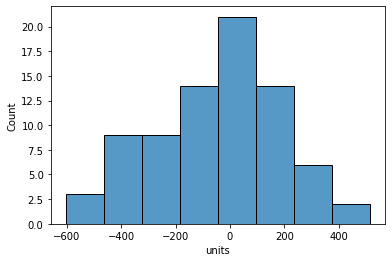

In [28]:
sns.histplot(y_test - test_predictions)

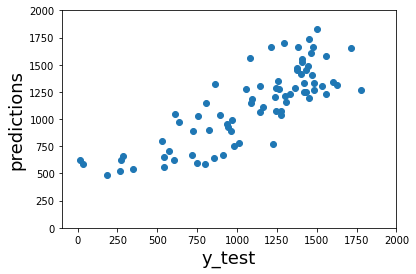

In [29]:
plt.scatter(y_test, test_predictions)
plt.xlabel("y_test", size = 18)
plt.ylabel("predictions", size = 18)
plt.xlim(-100,2000)
plt.ylim(0,2000)
plt.show()

In [30]:
df_pf = pd.DataFrame(test_predictions, columns=["Predictions"])

In [31]:
df_pf["y_test"] = y_test

In [32]:
y_test  = y_test.reset_index(drop=True)

In [33]:
df_pf["y_test"] = y_test
df_pf

,Predictions,y_test
0,1667.460232,1478.0
1,1232.704051,1559.0
2,1302.440046,1144.0
3,543.570281,345.0
4,898.007718,826.0
...,...,...
73,1484.985272,1446.0
74,1144.766279,809.0
75,1469.023979,1375.0
76,1580.682319,1559.0


In [34]:
df_pf["Residual"] = df_pf["y_test"] - df_pf["Predictions"]

In [35]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["y_test"]*100)

In [36]:
df_pf

,Predictions,y_test,Residual,Difference%
0,1667.460232,1478.0,-189.460232,12.818690
1,1232.704051,1559.0,326.295949,20.929824
2,1302.440046,1144.0,-158.440046,13.849654
3,543.570281,345.0,-198.570281,57.556603
4,898.007718,826.0,-72.007718,8.717641
...,...,...,...,...
73,1484.985272,1446.0,-38.985272,2.696077
74,1144.766279,809.0,-335.766279,41.503866
75,1469.023979,1375.0,-94.023979,6.838108
76,1580.682319,1559.0,-21.682319,1.390784


In [37]:
df_pf.describe()

,Predictions,y_test,Residual,Difference%
count,78.000000,78.000000,78.000000,78.000000
mean,1124.182341,1082.756410,-41.425931,90.065387
std,352.842891,416.514392,239.539456,455.431626
min,484.362461,16.000000,-604.208895,1.026545
25%,819.142948,813.250000,-196.292769,6.563760
50%,1186.446666,1220.500000,-21.443196,14.936420
75%,1338.441518,1416.250000,148.115910,26.145516
max,1828.337402,1780.000000,516.026566,3776.305591


In [38]:
df_pf.sort_values(by=["Difference%"])

,Predictions,y_test,Residual,Difference%
49,1277.985789,1265.0,-12.985789,1.026545
25,1450.243532,1435.0,-15.243532,1.062267
28,1415.804279,1399.0,-16.804279,1.201164
76,1580.682319,1559.0,-21.682319,1.390784
31,951.318857,938.0,-13.318857,1.419921
...,...,...,...,...
32,626.438645,274.0,-352.438645,128.627243
13,662.580864,286.0,-376.580864,131.671631
30,484.362461,185.0,-299.362461,161.817547
51,590.291207,37.0,-553.291207,1495.381641


The lower values of units are not very well predicted by the multilinear model, could be by an underlying factor that is not reflected in the provided data.